In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

#Крок 1: Завантаження та розпаковка датасету

In [ ]:
# 2.1 Завантаження датасету

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()
base_dir = 'cats_and_dogs_filtered'

#Крок 2: Завантаження даних, застосовуючи ImageDataGenerator

In [ ]:

# Определяем пути к тренировочным и валидационным директориям
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Создаем генератор изображений для тренировочных данных с масштабированием
train_datagen = ImageDataGenerator(rescale=1./255)

# Создаем генератор изображений для валидационных данных с масштабированием
validation_datagen = ImageDataGenerator(rescale=1./255)

# Генератор тренировочных данных
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Директория с тренировочными данными
    target_size=(150, 150),  # Размеры изображений после изменения
    batch_size=20,  # Размер пакета
    class_mode='binary'  # Тип меток: бинарная классификация
)

# Генератор валидационных данных
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,  # Директория с валидационными данными
    target_size=(150, 150),  # Размеры изображений после изменения
    batch_size=20,  # Размер пакета
    class_mode='binary'  # Тип меток: бинарная классификация
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#Крок 3: Побудова згорткової нейронної мережі

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

# Определяем архитектуру модели
model = models.Sequential([
    # Первый сверточный слой с 32 фильтрами и размером ядра 3x3, с активацией ReLU
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    # Слой подвыборки (MaxPooling) с размером окна 2x2
    layers.MaxPooling2D((2, 2)),
    # Второй сверточный слой с 64 фильтрами и размером ядра 3x3, с активацией ReLU
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Слой подвыборки (MaxPooling) с размером окна 2x2
    layers.MaxPooling2D((2, 2)),
    # Третий сверточный слой с 128 фильтрами и размером ядра 3x3, с активацией ReLU
    layers.Conv2D(128, (3, 3), activation='relu'),
    # Слой подвыборки (MaxPooling) с размером окна 2x2
    layers.MaxPooling2D((2, 2)),
    # Четвертый сверточный слой с 128 фильтрами и размером ядра 3x3, с активацией ReLU
    layers.Conv2D(128, (3, 3), activation='relu'),
    # Слой подвыборки (MaxPooling) с размером окна 2x2
    layers.MaxPooling2D((2, 2)),
    # Слой выравнивания для преобразования данных в одномерный массив
    layers.Flatten(),
    # Полносвязный слой с 512 нейронами и активацией ReLU
    layers.Dense(512, activation='relu'),
    # Выходной слой с 1 нейроном и сигмоидальной активацией для бинарной классификации
    layers.Dense(1, activation='sigmoid')
])

# Компиляция модели с использованием функции потерь binary_crossentropy, оптимизатора Adam и метрики accuracy
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(
    train_generator,  # Тренировочный генератор
    steps_per_epoch=100,  # Количество шагов на эпоху
    epochs=20,  # Количество эпох
    validation_data=validation_generator,  # Валидационный генератор
    validation_steps=50  # Количество шагов для валидации
)


Epoch 1/20
100/100 [==============================] - 12s 51ms/step - loss: 0.6966 - accuracy: 0.4950 - val_loss: 0.6925 - val_accuracy: 0.6380
Epoch 2/20
100/100 [==============================] - 6s 59ms/step - loss: 0.6926 - accuracy: 0.5240 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 3/20
100/100 [==============================] - 5s 48ms/step - loss: 0.6909 - accuracy: 0.5165 - val_loss: 0.6947 - val_accuracy: 0.4950
Epoch 4/20
100/100 [==============================] - 6s 59ms/step - loss: 0.6881 - accuracy: 0.5565 - val_loss: 0.6874 - val_accuracy: 0.5260
Epoch 5/20
100/100 [==============================] - 5s 48ms/step - loss: 0.6875 - accuracy: 0.5410 - val_loss: 0.6890 - val_accuracy: 0.5700
Epoch 6/20
100/100 [==============================] - 6s 59ms/step - loss: 0.6742 - accuracy: 0.5900 - val_loss: 0.6415 - val_accuracy: 0.6460
Epoch 7/20
100/100 [==============================] - 6s 56ms/step - loss: 0.6137 - accuracy: 0.6590 - val_loss: 0.6384 - val_accuracy: 0.653

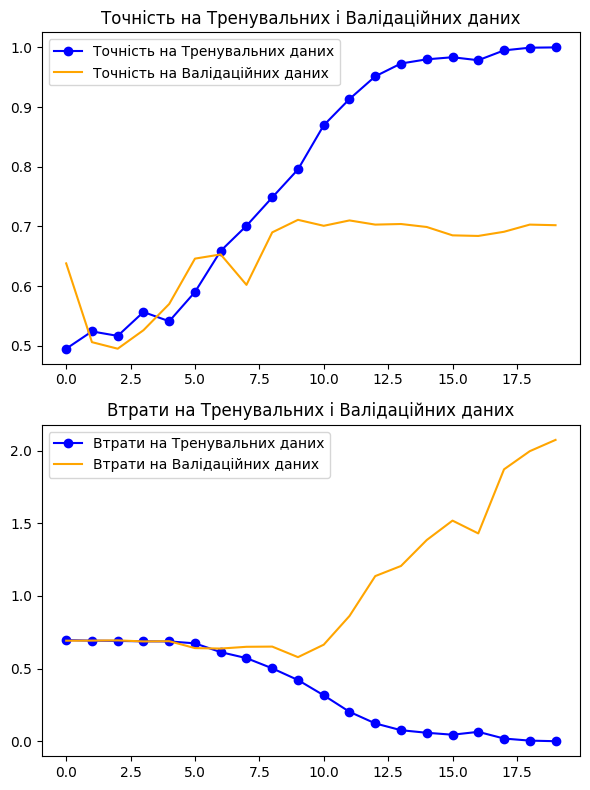

In [ ]:
import matplotlib.pyplot as plt

# Извлечение истории обучения
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Количество эпох
epochs = range(len(acc))

plt.figure(figsize=(6, 8))

# График точности обучения и проверки за эпоху
plt.subplot(2, 1, 1)
plt.plot(epochs, acc, 'bo-', label='Точність на Тренувальних даних')
plt.plot(epochs, val_acc, 'orange', label='Точність на Валідаційних даних')
plt.title('Точність на Тренувальних і Валідаційних даних')
plt.legend()

# График потерь при обучении и проверке за эпоху
plt.subplot(2, 1, 2)
plt.plot(epochs, loss, 'bo-', label='Втрати на Тренувальних даних')
plt.plot(epochs, val_loss, 'orange', label='Втрати на Валідаційних даних')
plt.title('Втрати на Тренувальних і Валідаційних даних')
plt.legend()

plt.tight_layout()
plt.show()


#Крок 4: Аугментація даних

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Случайные повороты изображений в диапазоне 40 градусов
    width_shift_range=0.2,  # Случайные сдвиги по ширине до 20%
    height_shift_range=0.2,  # Случайные сдвиги по высоте до 20%
    shear_range=0.2,  # Случайные преобразования сдвига (срезы) до 20%
    zoom_range=0.2,  # Случайные увеличения до 20%
    horizontal_flip=True,  # Случайные горизонтальные отражения
    fill_mode='nearest'  # Метод заполнения пикселей, выходящих за пределы изображения
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

history_aug = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)


Found 2000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 15s 152ms/step - loss: 0.7954 - accuracy: 0.5870 - val_loss: 0.6385 - val_accuracy: 0.6270
Epoch 2/20
100/100 [==============================] - 16s 163ms/step - loss: 0.6449 - accuracy: 0.6265 - val_loss: 0.6519 - val_accuracy: 0.6260
Epoch 3/20
100/100 [==============================] - 16s 165ms/step - loss: 0.6357 - accuracy: 0.6425 - val_loss: 0.5859 - val_accuracy: 0.7080
Epoch 4/20
100/100 [==============================] - 15s 152ms/step - loss: 0.6138 - accuracy: 0.6505 - val_loss: 0.5890 - val_accuracy: 0.6910
Epoch 5/20
100/100 [==============================] - 15s 155ms/step - loss: 0.6025 - accuracy: 0.6745 - val_loss: 0.6119 - val_accuracy: 0.6770
Epoch 6/20
100/100 [==============================] - 15s 150ms/step - loss: 0.5948 - accuracy: 0.6795 - val_loss: 0.5745 - val_accuracy: 0.6950
Epoch 7/20
100/100 [==============================] - 15s 151ms/step - loss: 0.5971 - ac

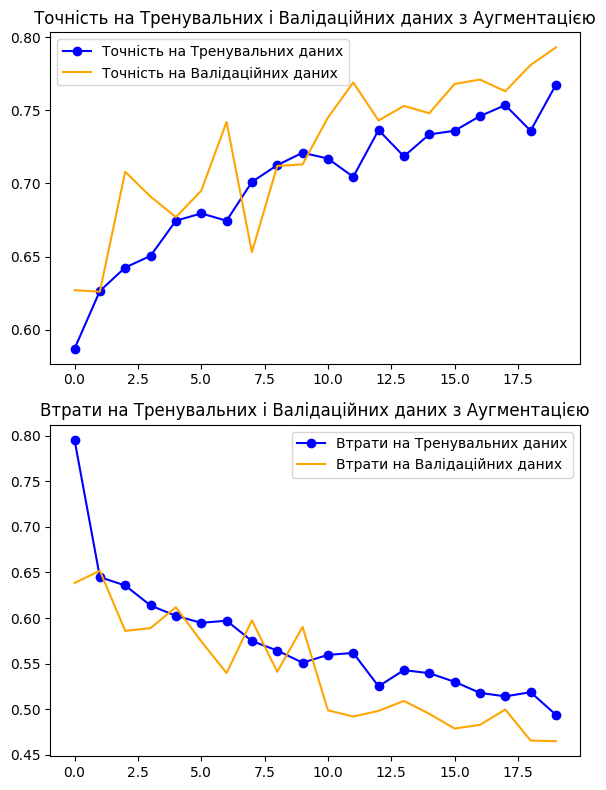

In [ ]:
# Извлечение истории обучения
acc_aug = history_aug.history['accuracy']
val_acc_aug = history_aug.history['val_accuracy']
loss_aug = history_aug.history['loss']
val_loss_aug = history_aug.history['val_loss']

# Количество эпох
epochs_aug = range(len(acc_aug))

plt.figure(figsize=(6, 8))

# График точности обучения и проверки за эпоху
plt.subplot(2, 1, 1)
plt.plot(epochs_aug, acc_aug, 'bo-', label='Точність на Тренувальних даних')
plt.plot(epochs_aug, val_acc_aug, 'orange', label='Точність на Валідаційних даних')
plt.title('Точність на Тренувальних і Валідаційних даних з Аугментацією')
plt.legend()

# График потерь при обучении и проверке за эпоху
plt.subplot(2, 1, 2)
plt.plot(epochs_aug, loss_aug, 'bo-', label='Втрати на Тренувальних даних')
plt.plot(epochs_aug, val_loss_aug, 'orange', label='Втрати на Валідаційних даних')
plt.title('Втрати на Тренувальних і Валідаційних даних з Аугментацією')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#model.save('/content/save DL_Laba2.1/save1.2.2.hdf5')

Крок 5: Transfer Learning

In [ ]:
from tensorflow.keras.applications import VGG16

# Загружаем предобученную модель VGG16 без верхних (полносвязных) слоев
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

# Замораживаем базовые слои
conv_base.trainable = False

# Создаем новую модель, добавляя к базовой новые полносвязные слои
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Обучение модели
history_tl = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/20
100/100 [==============================] - 22s 185ms/step - loss: 0.5147 - accuracy: 0.7760 - val_loss: 0.2844 - val_accuracy: 0.8790
Epoch 2/20
100/100 [==============================] - 18s 175ms/step - loss: 0.3825 - accuracy: 0.8310 - val_loss: 0.2793 - val_accuracy: 0.8730
Epoch 3/20
100/100 [==============================] - 19s 188ms/step - loss: 0.3513 - accuracy: 0.8435 - val_loss: 0.2597 - val_accuracy: 0.8820
Epoch 4/20
100/100 [==============================] - 18s 176ms/step - loss: 0.3461 - accuracy: 0.8445 - val_loss: 0.2602 - val_accuracy: 0.8900
Epoch 5/20
100/100 [==============================] - 17s 174ms/step - loss: 0.3184 - accuracy: 0.8585 - val_loss: 0.2653 - val_accuracy: 0.8840
Epoch 6/20
100/100 [==============================] - 18s 177ms/step - loss: 0.3294 - accuracy: 0.8490 - val_loss: 0.3578 - val_accuracy: 0.8500
Epoch 7/20
100/100 [==============================] - 18s 177ms/s

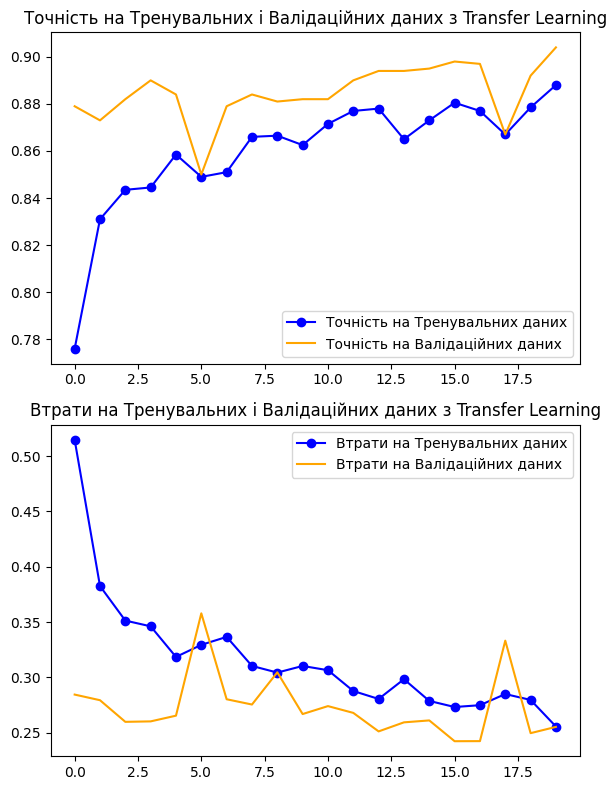

In [ ]:
# Извлечение истории обучения
acc_tl = history_tl.history['accuracy']
val_acc_tl = history_tl.history['val_accuracy']
loss_tl = history_tl.history['loss']
val_loss_tl = history_tl.history['val_loss']

# Количество эпох
epochs_tl = range(len(acc_tl))

plt.figure(figsize=(6, 8))

# График точности обучения и проверки за эпоху
plt.subplot(2, 1, 1)
plt.plot(epochs_tl, acc_tl, 'bo-', label='Точність на Тренувальних даних')
plt.plot(epochs_tl, val_acc_tl, 'orange', label='Точність на Валідаційних даних')
plt.title('Точність на Тренувальних і Валідаційних даних з Transfer Learning')
plt.legend()

# График потерь при обучении и проверке за эпоху
plt.subplot(2, 1, 2)
plt.plot(epochs_tl, loss_tl, 'bo-', label='Втрати на Тренувальних даних')
plt.plot(epochs_tl, val_loss_tl, 'orange', label='Втрати на Валідаційних даних')
plt.title('Втрати на Тренувальних і Валідаційних даних з Transfer Learning')
plt.legend()

plt.tight_layout()
plt.show()
